## NewsMood

#### Observations:
* CBS network had the highest compound average sentiment analysis at 0.33, slightly more than double that of any of the     other news networks analyzed with BBC following at 0.15 and CNN at 0.13. 
* Interestingly, the New York Times and Fox News, which could be considered to be the most politically opposite of the media outlets analyzed scored the lowest average sentiment analyses at 0.08 and 0.06 respectively. This could indicate that news with a more extreme political angle is more negative. 
* Overall sentiments from each media source are above 0, indicating a generally positive mood. This could be partly due to    news reports on the 2018 Oscars, which occured the evening of March 4, of which news posts tend to be more positive and upbeat.

In [126]:
#Import Statements,Twitter UserInformation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
from collections import OrderedDict
import seaborn as sns

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "JovP5qnpxryY3o0G0dgoMuouc"
consumer_secret = "Cfvxna8OlA7IFnkRNGR4qJxtOzfhixJl0l5HXmJg0ocDgwaYwD"
access_token = "967431307176407046-oQRgCSqnwFHBJ4MuK3pq9LtkqflsWBN"
access_token_secret = "vQ313qjSD1ImvyMQU06zbmvMq9tiIxuA7wrlZfmSSIDRC"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

outlets=["@BBC","@CBS","@CNN","@foxnews","@nytimes"]


In [127]:
# Loop through last 100 tweets for each news outlet,Perform Sentiment Analysis,Get Timestamp
timestamp=[]
text=[]
user=[]
compound=[]
pos=[]
neu=[]
neg=[]
tweetsago=[]
for outlet in outlets:
    counter=1
    for item in tweepy.Cursor(api.user_timeline,id=outlet).items(100):
        tweetinfo = json.dumps(item._json,indent=5)
        tweet = json.loads(tweetinfo)

        text.append(tweet["text"])
        user.append(tweet["user"]["name"])
        timestamp.append(tweet["created_at"])
        compound.append(analyzer.polarity_scores(tweet["text"])["compound"])
        pos.append(analyzer.polarity_scores(tweet["text"])["pos"])
        neu.append(analyzer.polarity_scores(tweet["text"])["neu"])
        neg.append(analyzer.polarity_scores(tweet["text"])["neg"])
        tweetsago.append(counter)
        counter=counter+1
                
df=pd.DataFrame(OrderedDict({"User":user,"TweetsAgo":tweetsago,"Text":text,"Timestamp":timestamp,
                             "Compound":compound,"Pos":pos,"Neu":neu,"Neg":neg}))
df.to_csv("Last100TweetsMajorNewsOutlets.csv")

In [128]:
df.head()

User  TweetsAgo                                               Text  \
0  BBC          1  😂 Who actually watched the #Oscars? https://t....   
1  BBC          2  No meat. No fish. No eggs. No milk. No cheese....   
2  BBC          3  Like father, like daughter.\n\n😂🔥 @GordonRamsa...   
3  BBC          4  RT @BBCFOUR: The little mouse that inspired Pi...   
4  BBC          5  "I made a promise to our six-year-old lead act...   

                        Timestamp  Compound    Pos    Neu    Neg  
0  Mon Mar 05 19:30:07 +0000 2018    0.0000  0.000  1.000  0.000  
1  Mon Mar 05 18:38:04 +0000 2018   -0.8555  0.000  0.592  0.408  
2  Mon Mar 05 17:23:22 +0000 2018    0.6124  0.263  0.737  0.000  
3  Mon Mar 05 17:15:34 +0000 2018    0.4472  0.211  0.789  0.000  
4  Mon Mar 05 17:00:31 +0000 2018    0.1531  0.105  0.818  0.077

In [129]:
newsoutlets=list(df["User"].unique())
mediasources=newsoutlets[:]
colors=["lightblue","green","red","blue","yellow"]
countoutlets=list(range(len(newsoutlets)))
for outlet in range(len(newsoutlets)):
    newsoutlets[outlet]=df.loc[df["User"]==newsoutlets[outlet]]

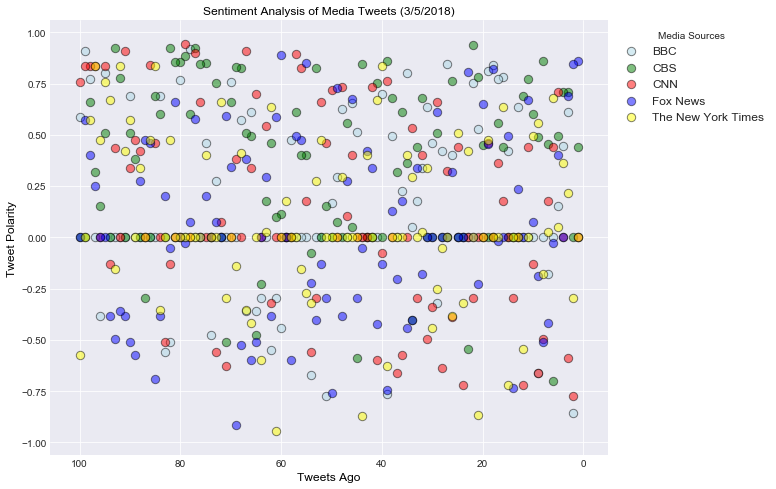

In [130]:
#Plot1: Sentiment Analysis of Media Tweets(Date)
font={'family': 'arial',
        'color':  'black',
        'size': 12}
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
for color,source,count in zip(colors,mediasources,countoutlets):
    sentiment=plt.scatter(newsoutlets[count]["TweetsAgo"],newsoutlets[count]["Compound"],
                          c=color,edgecolor="black",alpha=0.5,s=70,label=source)
plt.gca().invert_xaxis()
plt.title("Sentiment Analysis of Media Tweets (3/5/2018)",fontdict=font)
plt.xlabel("Tweets Ago",fontdict=font)
plt.ylabel("Tweet Polarity",fontdict=font)
leg=plt.legend(title="Media Sources",fontsize=12,bbox_to_anchor=(1,1))
plt.savefig("Sentiment_Analysis_Media_Tweets.png",bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()

In [131]:
#Calculate Avg Compound for Each Media Source
avgcompound=[]
for source in mediasources:
    avgcompound.append(round(df.loc[df["User"]==source]["Compound"].mean(),2))
avgcompound

[0.15, 0.33, 0.13, 0.06, 0.08]

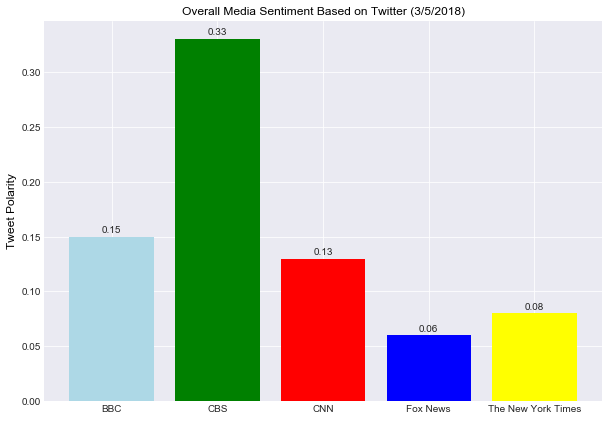

In [132]:
#Plot2: Overall Media Sentiment based on Twitter (Date)
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
overall=plt.bar(mediasources,avgcompound,color=colors)
plt.title("Overall Media Sentiment Based on Twitter (3/5/2018)",fontdict=font)
plt.ylabel("Tweet Polarity",fontdict=font)

rects=overall.patches
for rect,avg in zip(rects,avgcompound):
    plt.text(rect.get_x()+rect.get_width()/2,rect.get_height()+.01,avg,horizontalalignment="center",verticalalignment="top")
plt.savefig("Overal_Media_Sentiment.png")
plt.show()